In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip "/content/drive/MyDrive/pieski_png.zip"

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import models
from keras.utils import np_utils
import random, os
from google.colab.patches import cv2_imshow
import cv2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
dogs_valid = tf.keras.utils.image_dataset_from_directory("/content/pieski_png",
                                                   image_size=(224, 224), validation_split=0.1,
                                                   subset='validation', seed=123)
dogs_train = tf.keras.utils.image_dataset_from_directory('/content/pieski_png', 
                                                   image_size=(224, 224), validation_split=0.1,
                                                   subset='training', seed=123)

Found 6000 files belonging to 15 classes.
Using 600 files for validation.
Found 6000 files belonging to 15 classes.
Using 5400 files for training.


In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


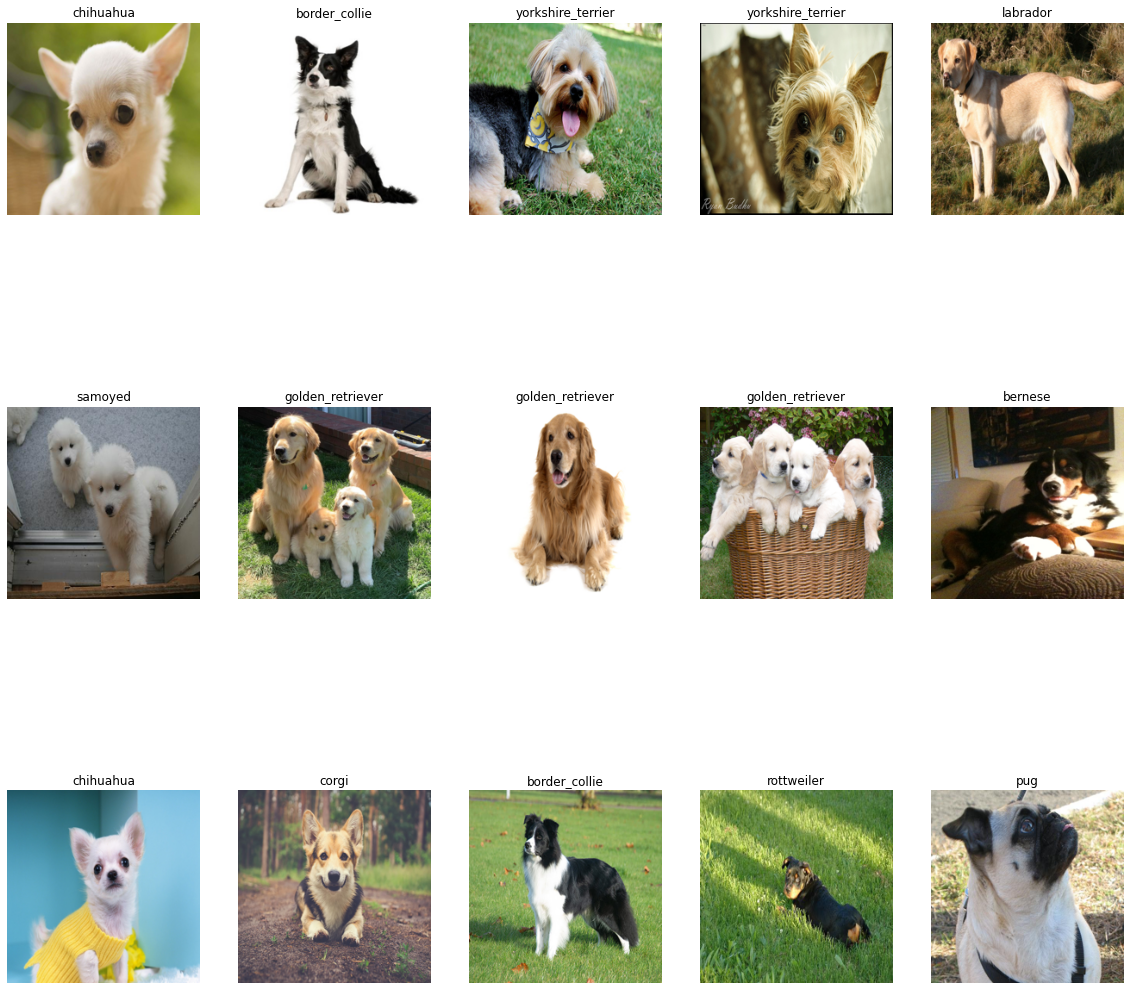

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in dogs_train.take(2):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(dog_labels[labels[i]])
    plt.axis("off")

## Inception V3 with transfer learning - 30 epochs

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 conv2d_754 (Conv2D)         (None, 5, 5, 16)          524304    
                                                                 
 batch_normalization_754 (Ba  (None, 5, 5, 16)         64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 2, 2, 16)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dropout_6 (Dropout)         (None, 64)               

In [ ]:
epochs = 30
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 116s 634ms/step - loss: 0.9975 - accuracy: 0.7483 - val_loss: 0.2965 - val_accuracy: 0.9250
Epoch 2/30
169/169 [==============================] - 106s 622ms/step - loss: 0.2640 - accuracy: 0.9469 - val_loss: 0.1761 - val_accuracy: 0.9517
Epoch 3/30
169/169 [==============================] - 106s 623ms/step - loss: 0.1169 - accuracy: 0.9774 - val_loss: 0.2316 - val_accuracy: 0.9417
Epoch 4/30
169/169 [==============================] - 106s 621ms/step - loss: 0.0979 - accuracy: 0.9794 - val_loss: 0.1903 - val_accuracy: 0.9517
Epoch 5/30
169/169 [==============================] - 106s 623ms/step - loss: 0.0774 - accuracy: 0.9837 - val_loss: 0.2235 - val_accuracy: 0.9450
Epoch 6/30
169/169 [==============================] - 106s 625ms/step - loss: 0.0763 - accuracy: 0.9830 - val_loss: 0.2266 - val_accuracy: 0.9367
Epoch 7/30
169/169 [==============================] - 106s 624ms/step - loss: 0.0649 - accuracy: 0.9863 - val_loss: 0.1873 - val_accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


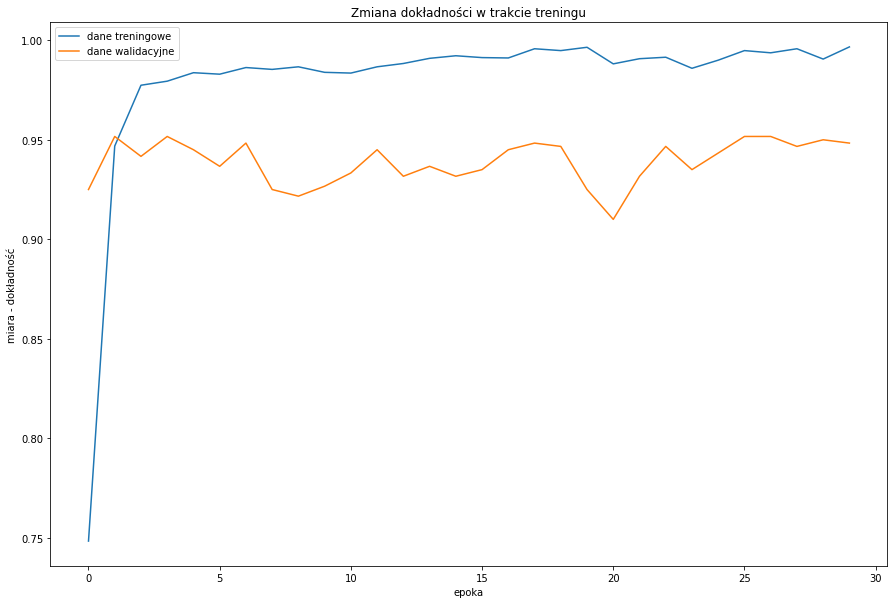

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

Found 150 files belonging to 15 classes.


In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))
 


In [ ]:
len(predicted_labels)

150

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")


Dokładność: 95.33%


In [ ]:
print(confusion_matrix(true_labels, predicted_labels))


[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  8  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  1  0  7  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]]


In [ ]:
print(classification_report(true_labels, predicted_labels))

                   precision    recall  f1-score   support

           beagle       0.91      1.00      0.95        10
          bernese       1.00      1.00      1.00        10
    border_collie       1.00      1.00      1.00        10
        chihuahua       0.83      1.00      0.91        10
            corgi       1.00      0.90      0.95        10
        dachshund       1.00      0.80      0.89        10
 golden_retriever       0.91      1.00      0.95        10
            husky       1.00      0.90      0.95        10
         labrador       1.00      0.70      0.82        10
       pomeranian       1.00      1.00      1.00        10
              pug       1.00      1.00      1.00        10
       rottweiler       0.83      1.00      0.91        10
          samoyed       1.00      1.00      1.00        10
        shiba_inu       0.91      1.00      0.95        10
yorkshire_terrier       1.00      1.00      1.00        10

         accuracy                           0.95      

## Inception V3 without transfer learning - 100 epochs

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3),include_top=False,weights=None)
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

In [ ]:
epochs = 100
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

In [ ]:
print(classification_report(true_labels, predicted_labels))

## MobileNetV2 with transfer learning - 30 epochs


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 16)          327696    
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 16)         64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 144)               0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 30
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


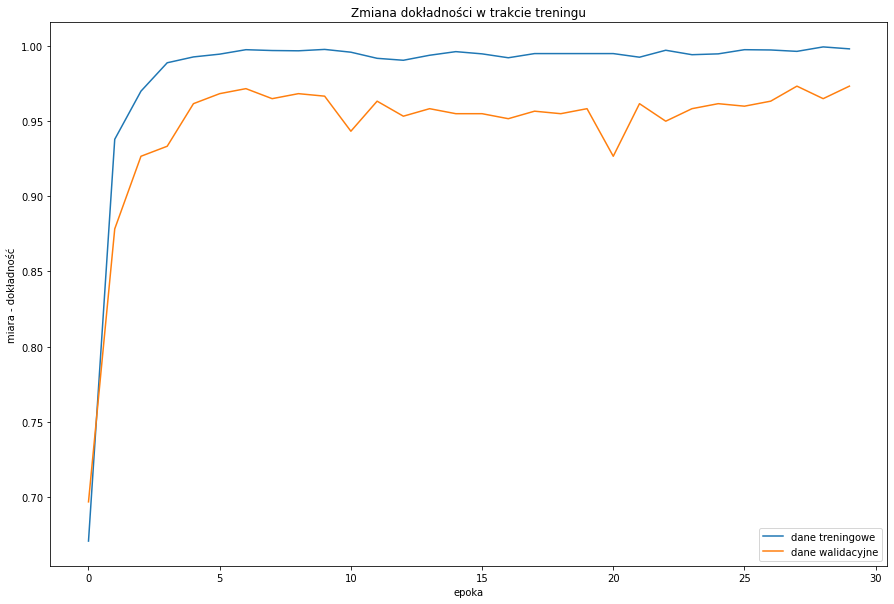

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

Archive:  /content/drive/MyDrive/pieski_test_foldery.zip
   creating: pieski_test_foldery/beagle/
  inflating: pieski_test_foldery/beagle/test_10.png  
  inflating: pieski_test_foldery/beagle/test_11.png  
  inflating: pieski_test_foldery/beagle/test_12.png  
  inflating: pieski_test_foldery/beagle/test_13.png  
  inflating: pieski_test_foldery/beagle/test_14.png  
  inflating: pieski_test_foldery/beagle/test_15.png  
  inflating: pieski_test_foldery/beagle/test_16.png  
  inflating: pieski_test_foldery/beagle/test_17.png  
  inflating: pieski_test_foldery/beagle/test_18.png  
  inflating: pieski_test_foldery/beagle/test_19.png  
   creating: pieski_test_foldery/bernese/
  inflating: pieski_test_foldery/bernese/test_130.png  
  inflating: pieski_test_foldery/bernese/test_131.png  
  inflating: pieski_test_foldery/bernese/test_132.png  
  inflating: pieski_test_foldery/bernese/test_133.png  
  inflating: pieski_test_foldery/bernese/test_134.png  
  inflating: pieski_test_foldery/bernese

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

Found 150 files belonging to 15 classes.


In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
plt.figure(figsize=(30, 30))
for images, labels in dogs_test.take(5):
  for i in range(labels.shape[0]):
    ax = plt.subplot(4,8, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    plt.xlabel("Przewidywana klasa: " + str(breed))

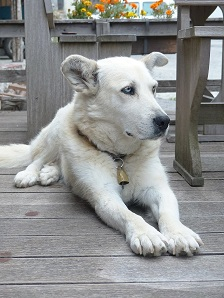

Prediction: labrador


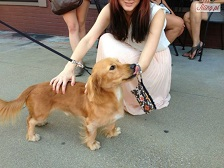

Prediction: dachshund


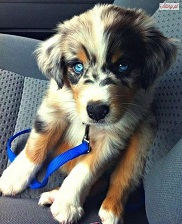

Prediction: bernese


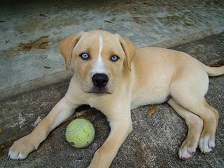

Prediction: labrador


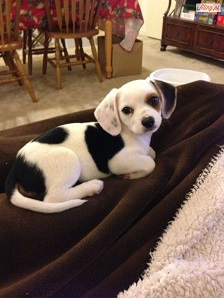

Prediction: beagle


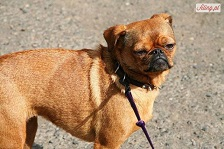

Prediction: dachshund


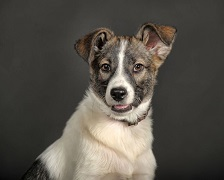

Prediction: border_collie


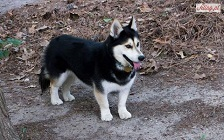

Prediction: husky


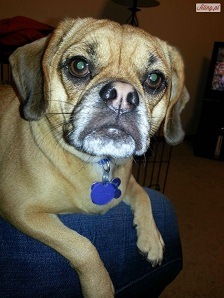

Prediction: beagle


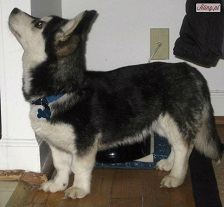

Prediction: husky


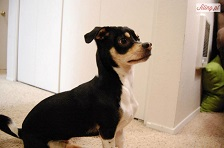

Prediction: rottweiler


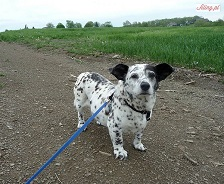

Prediction: border_collie


In [ ]:
true_labels = []
prediction_labels =[]
photos = os.listdir('/content/nierasowev2')
for photo in [p for p in photos if p.endswith('.png')]:
  true_label_split = photo.split(' ')
  # print(true_label_split[0])
  path = f'/content/nierasowev2/{photo}'
  # print(path)
  image = cv2.imread(path)
  # image = cv2.resize(image, (160, 160))
  cv2_imshow(image)
  img = tf.keras.utils.load_img(path, target_size=(224, 224))
  img_pred = tf.keras.utils.img_to_array(img)
  img_pred = tf.expand_dims(img_pred, 0)

  prediction = model.predict(img_pred)
  idx = np.argmax(prediction[0])
  print('Prediction:', dog_labels[idx])
  # print(prediction[0], prediction_label)
  
  # print(index)
  breed = dog_labels[idx]
  # print(breed)
  prediction_labels.append(breed)
  true_labels.append(true_label_split[0])


In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

Dokładność: 97.33%


In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

[[ 9  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]]


In [ ]:
print(classification_report(true_labels, predicted_labels))

                   precision    recall  f1-score   support

           beagle       0.82      0.90      0.86        10
          bernese       1.00      1.00      1.00        10
    border_collie       1.00      1.00      1.00        10
        chihuahua       1.00      1.00      1.00        10
            corgi       1.00      0.90      0.95        10
        dachshund       0.91      1.00      0.95        10
 golden_retriever       0.91      1.00      0.95        10
            husky       1.00      1.00      1.00        10
         labrador       1.00      0.80      0.89        10
       pomeranian       1.00      1.00      1.00        10
              pug       1.00      1.00      1.00        10
       rottweiler       1.00      1.00      1.00        10
          samoyed       1.00      1.00      1.00        10
        shiba_inu       1.00      1.00      1.00        10
yorkshire_terrier       1.00      1.00      1.00        10

         accuracy                           0.97      

## MobileNetV2 without transfer learning - 100 epochs


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),include_top=False,weights=None)
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_756 (Conv2D)         (None, 7, 7, 16)          327696    
                                                                 
 batch_normalization_756 (Ba  (None, 7, 7, 16)         64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 144)               0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 100
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

In [ ]:
print(classification_report(true_labels, predicted_labels))

## ResNet101 with transfer learning - 30 epochs


In [ ]:
base_model = tf.keras.applications.ResNet101(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

171458560/171446536 [==============================] - 8s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 16)          524304    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 16)         64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 144)               0         
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 30
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 228s 1s/step - loss: 1.0126 - accuracy: 0.7106 - val_loss: 0.9011 - val_accuracy: 0.7983
Epoch 2/30
169/169 [==============================] - 208s 1s/step - loss: 0.2226 - accuracy: 0.9457 - val_loss: 0.2699 - val_accuracy: 0.9250
Epoch 3/30
169/169 [==============================] - 209s 1s/step - loss: 0.0923 - accuracy: 0.9793 - val_loss: 0.2856 - val_accuracy: 0.9233
Epoch 4/30
169/169 [==============================] - 209s 1s/step - loss: 0.0716 - accuracy: 0.9837 - val_loss: 0.2452 - val_accuracy: 0.9300
Epoch 5/30
169/169 [==============================] - 209s 1s/step - loss: 0.0787 - accuracy: 0.9826 - val_loss: 0.2750 - val_accuracy: 0.9217
Epoch 6/30
169/169 [==============================] - 209s 1s/step - loss: 0.0391 - accuracy: 0.9920 - val_loss: 0.2616 - val_accuracy: 0.9267
Epoch 7/30
169/169 [==============================] - 209s 1s/step - loss: 0.0572 - accuracy: 0.9859 - val_loss: 0.4003 - val_accuracy: 0.9033
Epoch 8/30

KeyboardInterrupt: ignored

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

In [ ]:
print(classification_report(true_labels, predicted_labels))

## ResNet101 without transfer learning - 100 epochs


In [ ]:
base_model = tf.keras.applications.ResNet101(input_shape=(224, 224, 3),include_top=False,weights=None)
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

In [ ]:
epochs = 100
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

In [ ]:
print(classification_report(true_labels, predicted_labels))

## VGG16 with transfer learning - 30 epochs




In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

In [ ]:
epochs = 30
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

In [ ]:
print(classification_report(true_labels, predicted_labels))

## VGG without transfer learning - 100 epochs


In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),include_top=False,weights=None)
base_model.trainable = True
keras_model = tf.keras.Sequential()
keras_model.add(base_model)
keras_model.add(tf.keras.layers.Conv2D(16,kernel_size=4,activation='relu', input_shape =(224,224,3), padding='SAME'))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.MaxPooling2D())
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.3))
keras_model.add(tf.keras.layers.Dense(100, activation='relu'))
keras_model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model = keras_model
model.summary()

adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

In [ ]:
epochs = 100
history = model.fit(
    dogs_train,
    epochs=epochs,
    validation_data=dogs_valid)

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.title("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

In [ ]:
! unzip "/content/drive/MyDrive/pieski_test_foldery.zip"

In [ ]:
dogs_test = tf.keras.utils.image_dataset_from_directory("/content/pieski_test_foldery",
                                                   image_size=(224, 224))

In [ ]:
dog_labels =['beagle', 'bernese', 'border_collie', 'chihuahua', 'corgi', 
             'dachshund', 'golden_retriever', 'husky', 'labrador', 'pomeranian', 
             'pug', 'rottweiler', 'samoyed', 'shiba_inu', 'yorkshire_terrier']

In [ ]:
true_labels = []
predicted_labels = []
#plt.figure(figsize=(30, 30))
for images, labels in dogs_test:
  for i in range(labels.shape[0]):
    #ax = plt.subplot(4,8, i + 1)
    #plt.imshow(images[i].numpy().astype("uint8"))
    image = np.expand_dims(images[i], 0)
    prediction = model.predict(image)
    breed = (dog_labels[prediction.argmax()])
    true_labels.append(dog_labels[labels[i]])
    predicted_labels.append(breed)
    #plt.title("Prawdziwa klasa: "+ str(dog_labels[labels[i]]))
    #plt.xlabel("Przewidywana klasa: " + str(breed))

In [ ]:
acc = accuracy_score(true_labels, predicted_labels)*100
print("Dokładność: " + str(round(acc, 2)) + "%")

In [ ]:
print(confusion_matrix(true_labels, predicted_labels))

In [ ]:
print(classification_report(true_labels, predicted_labels))